# **Facial Emotion Detection**

# **Executive Summary** -
**What are the most important findings from the analysis done in Milestone? Describe the final proposed model specifications based on the input images and evaluate them**

The intent of this project is to train a model to determine facial expressions based on the input images. The model is trained on a dataset of labeled images, enabling it to classify expressions into four categories: happy, sad, neutral, and surprised. This can be used for emotion based applications. Potential applications of this technology include emotion analysis in education and driver behavior monitoring.

I have explored several models, including basic convolutional neural networks (CNNs) and transfer learning techniques for the milestone submission. CNN models yielded greater value in terms of accuracy as well as computation cost. Based on my research and experimentation, I concluded that using k-fold cross-validation with a CNN architecture would likely improve model accuracy and performance. I evaluated the models using F1-score and recall metrics.

Reasons for using K-fold cross validation:
* K-fold allowed me to assess the model's performance on diverse data subsets, leading to a more robust and accurate final model.
* Compared to single-split validation with a basic CNN, k-fold with CNN yielded a significant improvement in F1-score and recall, demonstrating its effectiveness in this specific task.
* K-fold provided a flexible framework to experiment with different CNN architectures and hyperparameters, allowing me to find the best configuration for this dataset.

# **Problem and Solution Summary**

**The context**: Many applications that involve safety, security and mental health require the use of facial emotion detection capabilities. For example, Automotive vendors , especially the self driving cars, can use computer vision technology to monitor the driver's emotional state. An extreme emotional state or drowsiness could trigger an alert for the driver. In another example, these algorithms can be used to recognize emotions that can be used to aid detection and intervention of mental health.

**The objectives**: The objective of this project is to use Deep Learning algorithms to device an emotion detection model that can identify the emotion of the person based on the input images.

**The key questions**: While working on this project, some key questions to think about are:

1. How many expressions are represented in the input dataset and how well is the input data set organised?

2. What are the preprocessing methods we need to use before incorporating these images into a model?

3. What are the different models available and what is the expected accuracy to decide on a specific model to be effective?

4. What performance metrics (e.g., accuracy, precision, recall) are relevant for this application? What level of performance is acceptable, and how to measure it on unseen data?

**The problem formulation**: We are trying to see if a machine learning algorithm can properly identify an emotion to be effective enough in a follow-on application.


# Proposed Model

I propose employing a convolutional neural network (CNN) architecture in conjunction with k-fold cross-validation. This approach combines the powerful feature extraction capabilities of CNNs with the rigorous evaluation technique of k-fold cross-validation. By partitioning the dataset into k equally sized subsets and iteratively training and evaluating the model on different combinations of these folds, we can obtain a more accurate estimation of the model's generalization performance.

1.**Build a simple CNN model**

* Three convolutional blocks: Each block comprises a 2D convolutional layer with a specific number of filters (32, 64, 128), followed by max-pooling and batch normalization for efficiency.
* Flattening and dense layers: The extracted features are flattened and fed into dense layers with ReLU activation for further processing.
* Final output: A final dense layer with softmax activation ensures accurate classification. Softmax is designed for multi-class classification problems, as in emotion detection, we typically want to classify an image into one of several emotion categories (e.g., happy, sad, neutral, surprise)
* Input specifications: Designed for grayscale images with dimensions 48x48 pixels.

2.**Perform K-Fold Cross Validation**

Define a function in Python to perform K-Fold validation.
* Split the data into k folds using KFold.
        For each fold:
            Create two data generators:
                One for the training set with data augmentation (rotation, zooming, shifting).
                One for the validation set without augmentation.
* Then train the CNN (mentioned above) on the training generator for 20 number of epochs.
* Evaluate the trained model on the validation generator and calculates metrics like loss, accuracy, precision, recall, and F1-score.
* Store these metrics for each fold. Visualize the training and validation loss and accuracy curves.
* Return the dictionary with all the collected performance results.

This function essentially trains the model multiple times on different subsets of the data, allowing for more robust evaluation and generalization.


3.**Plot the Confusion matrix**
* Calculates precision, recall, F1-score, and support for each class using classification_report.
* Print the report, providing insights into model performance for each emotion class.
* Create a confusion matrix using confusion_matrix, showing how many images were correctly and incorrectly classified for each class.
* Generate a heatmap of the confusion matrix using Seaborn for visual clarity.

# **Recommendations for implementation**

Below are some problems and key recommendations.

1. Imperfections in Dataset: Many images in the sad and neutral datasets were ambiguous and difficult to distinguish even for human observers. To ensure accurate model training and reliable results, it is crucial to thoroughly clean and correct the dataset by removing or relabeling any confusing or mislabeled images before proceeding with model setup and training.

2. Computing power and cost: While convolutional neural networks (CNNs) are computationally efficient, incorporating k-nearest neighbors (KNN) validation into the model architecture was crucial for improving the model's performance and reliability. Despite the additional computational cost incurred by the KNN validation process, it was a necessary step to ensure the model's predictions were accurate and trustworthy. As a result, when training this enhanced CNN model on Google Colab, I had to upgrade my subscription and purchase additional compute units to meet the increased demand for computational resources imposed by the KNN validation process. The investment in computational power was justified by the significant performance gains achieved through the KNN validation, making it an essential component of the model's architecture.

3. Ensemble with KNN: Instead of using KNN solely for validation, consider ensembling the CNN model's predictions with those of the KNN algorithm during inference. This can leverage the strengths of both models and potentially improve overall accuracy.

**Key Actionables for Stakeholders:**

1. Invest in acquiring a diverse and high-quality dataset of facial images with labeled emotions.
2. Allocate computational resources (e.g., GPUs, cloud computing) for training and evaluating the CNN model.
3. Establish performance metrics and evaluation criteria for the emotion detection model.
4. Develop a plan for model deployment, integration, and maintenance in the target application or system.


**Further Analysis**

To attain higher accuracy in the emotion detection task, further optimization efforts are necessary. This includes a meticulous tuning process for the hyperparameters and the learning rate employed in the model training process. By systematically adjusting these critical model configurations, we can unlock the potential for enhanced performance and more precise emotion recognition capabilities.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
import zipfile
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Python for datascience/deep_learning_project/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
folder_path = "Facial_emotion_images/"
IMAGE_SIZE = 48
BATCH_SIZE = 64
NUM_CLASSES = 4
EPOCHS = 20
TRAIN_DIR = folder_path + "train/"
TEST_DIR = folder_path + "test/"
VAL_DIR = folder_path + "validation/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

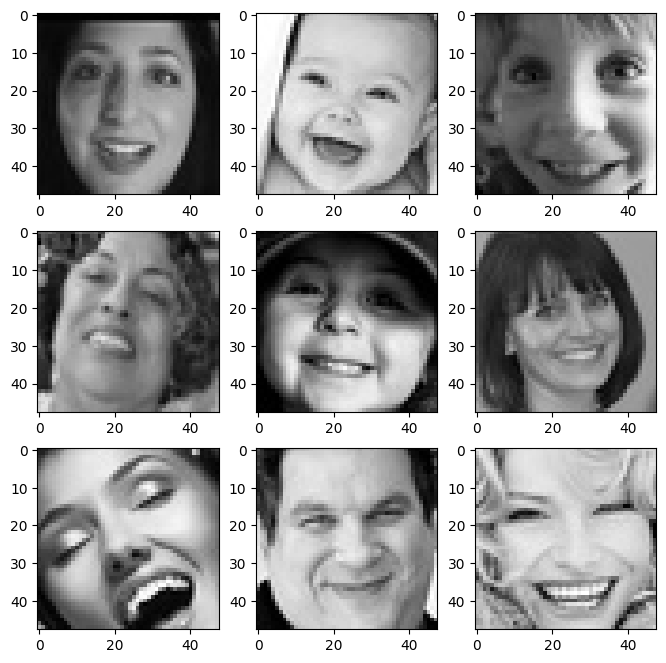

In [5]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

When analyzing happy images, two unique visual features stand out as reliable indicators of joyful expressions. Firstly, the corners of the mouth are distinctly raised, forming a characteristic smiling shape. Secondly, the imagery often reveals the subject's teeth being visible or shown, accompanying the upturned corners of the mouth. Together, these two cues – raised mouth corners coupled with a visible display of teeth – serve as prominent markers for identifying and classifying facial expressions of happiness and joy. Accounting for both these visual traits can enhance the accuracy and robustness of models trained to detect happy emotions from facial imagery.

### **Sad**

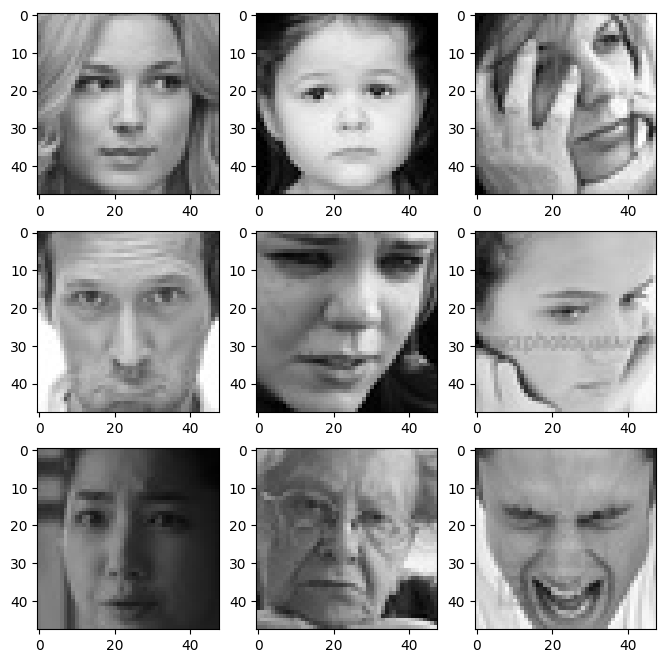

In [6]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
plt.show()

**Observations and Insights:**

When observing sad facial expressions, there are two distinct visual cues that can serve as reliable indicators of sadness or distress. One key feature is the furrowing or frowning of the brows, which creates wrinkles or creases in the forehead region. Additionally, the corners of the lips tend to be pulled downwards, a characteristic often referred to as the "lip corner depressor." This downward turn of the mouth corners contrasts with the upturned shape seen in happy expressions. By examining these two unique traits – furrowed brows and depressed lip corners – models can be trained to accurately identify and classify facial imagery depicting sadness or melancholic emotions. Accounting for these visual markers is crucial for enhancing the performance of emotion detection systems, particularly when dealing with sad or distressed expressions.

### **Neutral**

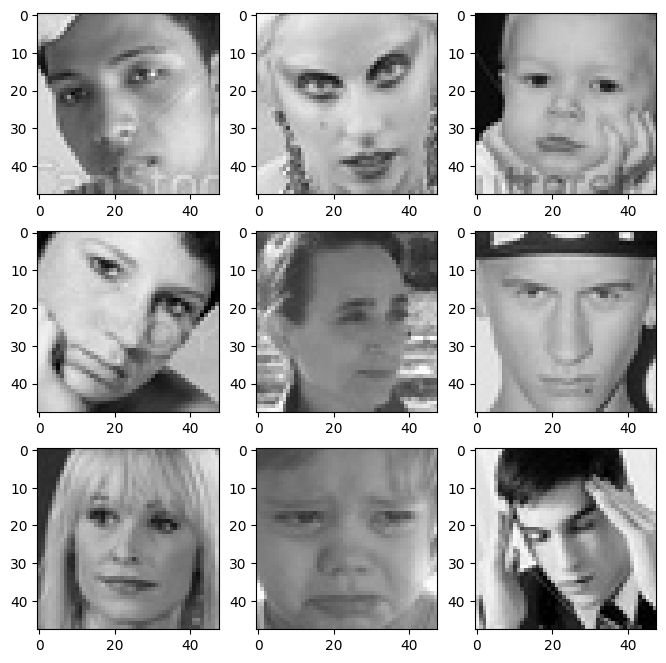

In [7]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
plt.show()

**Observations and Insights:**

When analyzing neutral facial expressions, one of the key visual cues to identify is a closed mouth without any noticeable raising or lowering of the edges. In a neutral expression, the lips are typically relaxed and the corners of the mouth maintain a straight, horizontal line without any upward or downward curvature. This absence of pronounced mouth movements or shapes is a distinct feature that can aid in recognizing and classifying neutral facial imagery. By training models to detect this specific visual trait of a closed, straight mouth without any raised edges, the accuracy of neutral expression identification can be significantly improved.


### **Surprised**

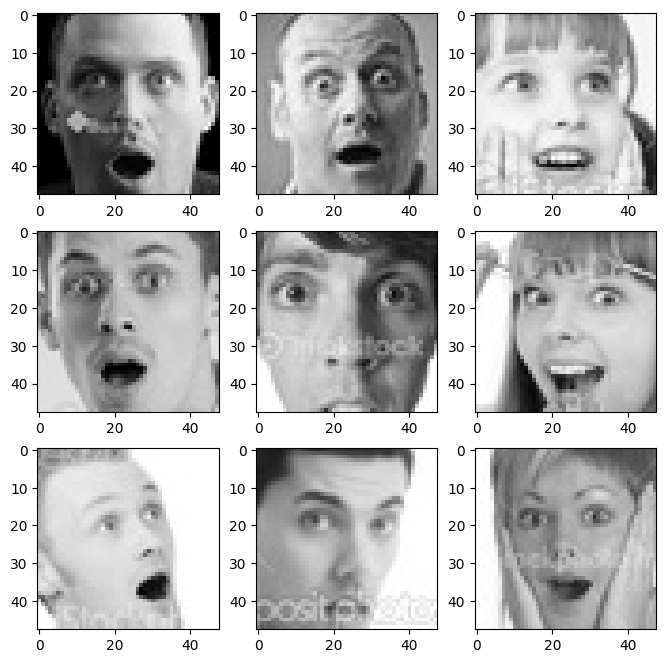

In [8]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMAGE_SIZE, IMAGE_SIZE))
    plt.imshow(img)
plt.show()

**Observations and Insights:__**

When examining facial expressions of surprise, there are several distinct visual cues that can aid in accurate identification and classification. One prominent feature is a dropped or open jaw, with the mouth forming a distinctive 'O' shape. Additionally, the eyebrows are often raised, creating a lifted and widened appearance of the eyes. This combination of a dropped jaw, raised brows, and wide-open eyes creates a characteristic look of astonishment or shock. By training models to detect these unique visual markers – the 'O'-shaped mouth, raised eyebrows, and widened eyes – the ability to recognize surprised facial expressions can be significantly enhanced. Accounting for this ensemble of visual traits is crucial for building robust emotion detection systems capable of accurately classifying surprise, one of the fundamental human emotions expressed through facial features.

## **Checking Distribution of Classes**

In [9]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


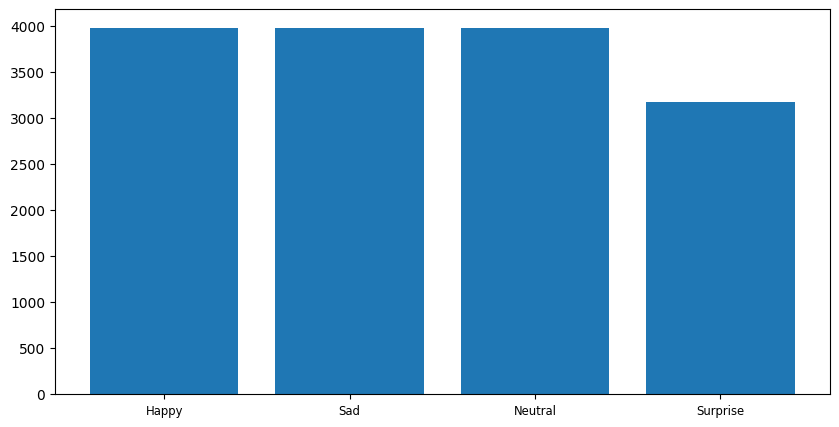

In [10]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**

Our training data shows that "surprise" class has fewer examples compared to others. While this typically raises concerns about bias and underrepresentation, I believe it might not be a major issue in this specific case. Here's why:

1. Potential Ease of Identification: My intuition suggests that "surprise" might be inherently easier to identify due to its distinct characteristic - the specific "O" shape of the mouth. This differentiates it visually from other categories, potentially making it less reliant on a large number of training images.

2. Testing the Hypothesis: However, this is just speculation, and we must validate it through testing. The model's performance will reveal the truth. If the "surprise" class struggles despite its unique feature, then taking action will be necessary.

3. Transfer Learning for the Rescue: If the lack of data proves problematic, we can leverage the power of transfer learning. This involves using a pre-trained model on a large, diverse dataset and fine-tuning it for our specific task.

4. We can also use F1-score as a metric, which considers both precision and recall, making it suitable for imbalanced datasets.

**Think About It:**
**Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?**

The surprise data set is lesser than the others by about 400 count. It may not be much of a problem as the feature which identifies the surprise class is very distinct.

**Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?**

We could do Data Visualization, i.e. we will use Confusion matrix to visualize how the model confuses "surprise" with other classes. We could also use Descriptive Statistics i.e. we will Compute accuracy, precision, recall, and F1-score to quantify the performance imbalance.

## **CNN vs ANN**

* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?

Considering emotion detection from images, Convolutional Neural Networks (CNNs) are generally considered the preferred approach over traditional Artificial Neural Networks (ANNs) due to several key advantages:

Strengths of CNNs for emotion detection:

  1. Exploiting spatial information: Emotions are often conveyed through subtle changes in facial features and their spatial relationships. CNNs excel at extracting features from local image patches, making them ideal for capturing these nuances.
  2. Learning hierarchical features: CNNs automatically learn and combine low-level (e.g., edges, textures) and high-level (e.g., facial landmarks, expressions) features, crucial for accurate emotion recognition.
  3. Handling image variations: Facial expressions can vary significantly in terms of pose, lighting, and individual differences. CNNs can learn these variations through image augmentation and filter weights, improving generalization.
  4. Proven effectiveness: Numerous emotion detection models leverage CNNs, demonstrating their effectiveness and superior performance in this domain, further solidifying their suitability for emotion recognition tasks.

Limitations of ANNs for emotion detection:

  1. Inability to leverage spatial information: Traditional ANNs process image data as single vectors, losing spatial relationships between pixels, which are critical for recognizing emotions.
  2. Limited feature extraction: ANNs rely on manually engineered features or simple feature extraction techniques, which may not capture the complexity of emotions.
  3. Susceptibility to overfitting: Without spatial awareness, ANNs often require larger datasets and may be more prone to overfitting compared to CNNs.

  


* What are the advantages of CNNs over ANNs and are they applicable here?

CNNs are generally the preferred choice for emotion detection in images due to their ability to capture spatial information, learn hierarchical features, handle image variations, and demonstrably achieve high accuracy.

At the heart of Convolutional Neural Networks (CNNs) lies the concept of convolution. Its main purpose is to extract meaningful features from input images.

CNNs shine in their ability to capitalize on the natural structure of images. Unlike traditional algorithms that treat each pixel independently, CNNs utilize filters that:

  Preserve local context: By considering neighboring pixels during feature extraction, they capture the spatial relationships within the image, understanding how pixels relate to each other. This is crucial for recognizing patterns within an image.

  Build progressively complex features: As the network layers deepen, it extracts features of increasing abstraction. Imagine zooming out from a painting; you start seeing larger shapes and relationships between components, not just individual brushstrokes. This hierarchical learning allows the network to capture both fine-grained details and broader concepts, leading to a richer understanding of the image.

That is the reason CNN is used to scan the image to identify the curves of the mouth, widening of eyes, frowns etc in the images to detect emotions.





## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.



# Loading Images and Labels for K-Fold Cross Validation

In [11]:
import glob
import cv2

# Load images and labels
def load_data(directory):
    images = []
    labels = []
    label_map = {'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}

    for label, idx in label_map.items():
        # Get a list of all image paths
        image_paths = glob.glob(os.path.join(directory + label + "/", "*.jpg"))

        print(f"Loading images for label '{label}': {image_paths}")
        for image_path in image_paths:
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(idx)

    #Returns the loaded images as a NumPy array and the labels as a NumPy array of integers.
    return np.array(images), np.array(labels, dtype=np.int32)

In [12]:
# Load all the images under training and validation data
X_train, y_train = load_data(TRAIN_DIR)
X_val, y_val = load_data(VAL_DIR)

Loading images for label 'happy': ['Facial_emotion_images/train/happy/23302.jpg', 'Facial_emotion_images/train/happy/24041.jpg', 'Facial_emotion_images/train/happy/29418.jpg', 'Facial_emotion_images/train/happy/29424.jpg', 'Facial_emotion_images/train/happy/32251.jpg', 'Facial_emotion_images/train/happy/19728.jpg', 'Facial_emotion_images/train/happy/16393.jpg', 'Facial_emotion_images/train/happy/35419.jpg', 'Facial_emotion_images/train/happy/22569.jpg', 'Facial_emotion_images/train/happy/33570.jpg', 'Facial_emotion_images/train/happy/31410.jpg', 'Facial_emotion_images/train/happy/32037.jpg', 'Facial_emotion_images/train/happy/20176.jpg', 'Facial_emotion_images/train/happy/31525.jpg', 'Facial_emotion_images/train/happy/30955.jpg', 'Facial_emotion_images/train/happy/32648.jpg', 'Facial_emotion_images/train/happy/27078.jpg', 'Facial_emotion_images/train/happy/20270.jpg', 'Facial_emotion_images/train/happy/34487.jpg', 'Facial_emotion_images/train/happy/26503.jpg', 'Facial_emotion_images/tr

In [13]:
# Print the shape of the loaded data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (15109, 48, 48)
y_train shape: (15109,)
X_val shape: (4977, 48, 48)
y_val shape: (4977,)


In [14]:
# Normalize and reshape the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_train = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_val = X_val.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

In [15]:
# Print the shape of the loaded data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (15109, 48, 48, 1)
y_train shape: (15109,)
X_val shape: (4977, 48, 48, 1)
y_val shape: (4977,)


In [16]:
# Convert label arrays to integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)

#Performs one-hot encoding on the y_train labels.
#This converts each label into a binary vector where only the index corresponding to the correct class is 1, and all other indices are 0.
y_train = np.eye(NUM_CLASSES, dtype=np.float32)[y_train]
y_val = np.eye(NUM_CLASSES, dtype=np.float32)[y_val]

# Ensure labels have the correct shape.
# The -1 indicates that the first dimension should be automatically inferred based on the number of samples,
# while the second dimension is fixed to NUM_CLASSES to accommodate the one-hot encoded vectors.
y_train = y_train.reshape(-1, NUM_CLASSES)
y_val = y_val.reshape(-1, NUM_CLASSES)

In [17]:
from keras import backend as K
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **Creating the model**

In [18]:
# I tried different parameters here.
def create_model(input_shape):

    # Let's create a sequential model, which is a linear stack of layers
    cnn_model = Sequential([

        # Adds a 2D convolutional layer with 32 filters, each of size (3,3), using the ReLU activation function
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),

        # Adds a 2D max-pooling layer with a pool size of (2,2) to reduce spatial dimensions
        MaxPooling2D(2,2),

        # Adds batch normalization to normalize and stabilize activations
        BatchNormalization(),

        # Adds another 2D convolutional layer with 64 filters and ReLU activation
        Conv2D(64, (3,3), activation='relu', input_shape=input_shape),

        # Adds another 2D max-pooling layer
        MaxPooling2D(2,2),

        # Adds batch normalization
        BatchNormalization(),

        # Adds a third 2D convolutional layer with 128 filters and ReLU activation
        Conv2D(128, (3,3), activation='relu', input_shape=input_shape),

        # Adds another 2D max-pooling layer
        MaxPooling2D(2,2),

        # Adds batch normalization
        BatchNormalization(),

        # Flattens the 3D output to a 1D vector for the fully connected layers
        Flatten(),

        # Adds a dense (fully connected) layer with 128 neurons and ReLU activation
        Dense(128, activation='relu'),

        # Adds the final dense layer with 4 neurons and softmax activation for 4 classes: happy, sad, neutral, angry
        Dense(4, activation='softmax')
    ])
    return cnn_model

In [19]:
#Model summary

finalmodel = create_model((IMAGE_SIZE, IMAGE_SIZE, 1))

finalmodel.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                        

# **Compiling the model**

In [20]:
# Compiles the model with the specified optimizer, loss function, and metrics for training
finalmodel.compile(

    # Uses the RMSprop optimizer with a learning rate of 0.001.
    # RMSprop can be more stable and reliable than Adam, especially with noisy gradients or datasets with imbalanced classes.
    # May be better suited for smaller datasets.
    optimizer=RMSprop(learning_rate=0.001),

    # Uses categorical crossentropy as the loss function for multi-class classification
    loss='categorical_crossentropy',

    # Monitors accuracy, recall, f1-score as a metric during training
    metrics=['accuracy', precision_score, recall_score, f1_score]
)


# **Training and Validating the model using K-FOld Cross Validation**

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def train_model(x_train, y_train, batch_size, epochs, input_shape, k_folds):
    """
    Trains a CNN model using k-fold cross-validation, data augmentation, and calculates various metrics.

    Args:
        training_images (numpy.ndarray): Training image data.
        training_labels (numpy.ndarray): Training labels.
        batch_size (int): Batch size for training i.e. 64 given here.
        epochs (int): Number of training epochs i.e. 30 given here.
        learning_rate (float): Learning rate for the optimizer.
        input_shape (tuple, optional): Input shape of the images (default: (48, 48, 1)).
        k_folds (int, optional): Number of folds for k-fold cross-validation (default: 5).

    Returns:
        dict: Dictionary containing k-fold performance results and confusion matrices.
    """
    kf = KFold(n_splits=k_folds)
    # Initialize a variable to store total accuracy across folds
    total_accuracy = 0

    cv_results = {'precision': [], 'recall': [], 'f1_score': [], 'loss': [], 'accuracy': [], 'confusion_matrices': []}
    #for train_index, val_index in kf.split(x_train):
    for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):

        # Data augmentation for training set
        train_datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False
        )

        # No augmentation for validation
        val_datagen = ImageDataGenerator()

        # Split data into training and validation sets
        x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        train_datagen.fit(x_train_fold)
        val_datagen.fit(x_val_fold)

        # Create data generators
        train_generator = train_datagen.flow(x_train_fold, y_train_fold, batch_size=batch_size)
        val_generator = val_datagen.flow(x_val_fold, y_val_fold, batch_size=batch_size)

        #model = create_model(learning_rate, input_shape)

        K4model = finalmodel.fit(train_generator,
                                      steps_per_epoch=len(train_generator),
                                      epochs=epochs,
                                      validation_data=val_generator,
                                      validation_steps=len(val_generator))
        # Evaluate on validation set
        loss, accuracy, precision, recall, f1_score = finalmodel.evaluate(val_generator)

        # Store results
        cv_results['precision'].append(precision)
        cv_results['recall'].append(recall)
        cv_results['f1_score'].append(f1_score)
        cv_results['loss'].append(loss)
        cv_results['accuracy'].append(accuracy)

        # Update total accuracy for this fold
        total_accuracy += accuracy


        # Plot loss and accuracy for current fold
        plt.figure(figsize=(10, 6))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(K4model.history['loss'], label='Training Loss')
        plt.plot(K4model.history['val_loss'], label='Validation Loss')
        plt.title(f'Fold {fold+1} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(K4model.history['accuracy'], label='Training Accuracy')
        plt.plot(K4model.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Fold {fold+1} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()  # Display the plot for this fold

    # Calculate and print average accuracy
    average_accuracy = total_accuracy / k_folds
    print(f"Average accuracy across {k_folds} folds: {average_accuracy:.4f}")
    return cv_results


### **Compiling and Training the Model**

Epoch 1/20
189/189 [==============================] - 5s 26ms/step - loss: 0.5005 - accuracy: 0.8110 - precision_score: 0.8321 - recall_score: 0.7850 - f1_score: 0.8076 - val_loss: 0.6383 - val_accuracy: 0.7674 - val_precision_score: 0.8020 - val_recall_score: 0.7439 - val_f1_score: 0.7716
Epoch 2/20
189/189 [==============================] - 5s 26ms/step - loss: 0.4592 - accuracy: 0.8207 - precision_score: 0.8399 - recall_score: 0.7979 - f1_score: 0.8181 - val_loss: 0.9208 - val_accuracy: 0.6949 - val_precision_score: 0.7273 - val_recall_score: 0.6737 - val_f1_score: 0.6993
Epoch 3/20
189/189 [==============================] - 5s 26ms/step - loss: 0.4599 - accuracy: 0.8167 - precision_score: 0.8361 - recall_score: 0.7938 - f1_score: 0.8142 - val_loss: 0.4985 - val_accuracy: 0.8422 - val_precision_score: 0.8596 - val_recall_score: 0.8294 - val_f1_score: 0.8441
Epoch 4/20
189/189 [==============================] - 5s 26ms/step - loss: 0.4556 - accuracy: 0.8206 - precision_score: 0.8389 

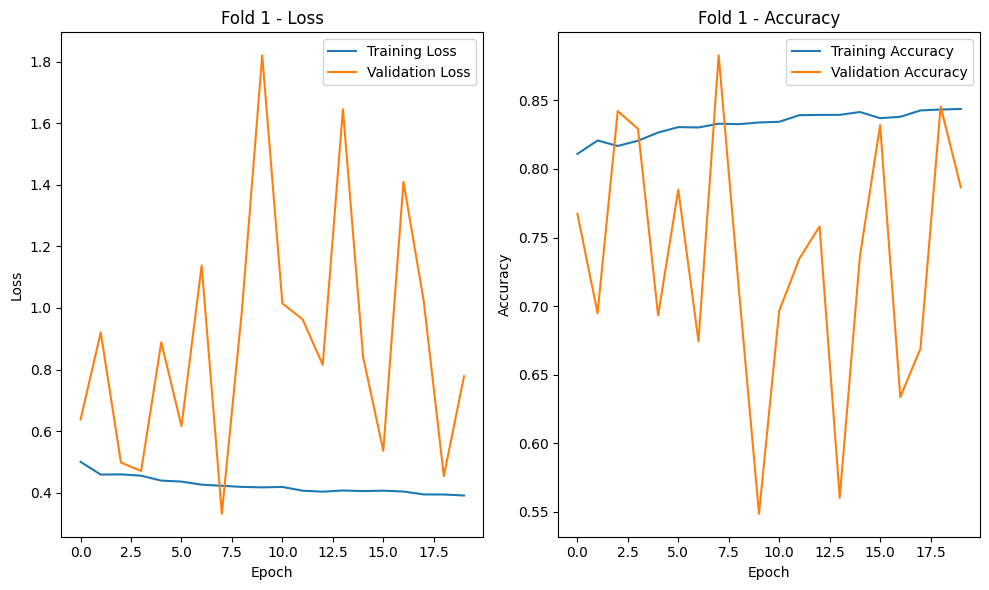

Epoch 1/20
189/189 [==============================] - 5s 26ms/step - loss: 0.4160 - accuracy: 0.8433 - precision_score: 0.8644 - recall_score: 0.8218 - f1_score: 0.8424 - val_loss: 0.9158 - val_accuracy: 0.5956 - val_precision_score: 0.6235 - val_recall_score: 0.5575 - val_f1_score: 0.5883
Epoch 2/20
189/189 [==============================] - 5s 25ms/step - loss: 0.4105 - accuracy: 0.8486 - precision_score: 0.8665 - recall_score: 0.8269 - f1_score: 0.8461 - val_loss: 0.6909 - val_accuracy: 0.7204 - val_precision_score: 0.7362 - val_recall_score: 0.6948 - val_f1_score: 0.7148
Epoch 3/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3989 - accuracy: 0.8524 - precision_score: 0.8719 - recall_score: 0.8340 - f1_score: 0.8524 - val_loss: 0.4561 - val_accuracy: 0.8124 - val_precision_score: 0.8329 - val_recall_score: 0.7848 - val_f1_score: 0.8080
Epoch 4/20
189/189 [==============================] - 5s 25ms/step - loss: 0.3796 - accuracy: 0.8577 - precision_score: 0.8771 

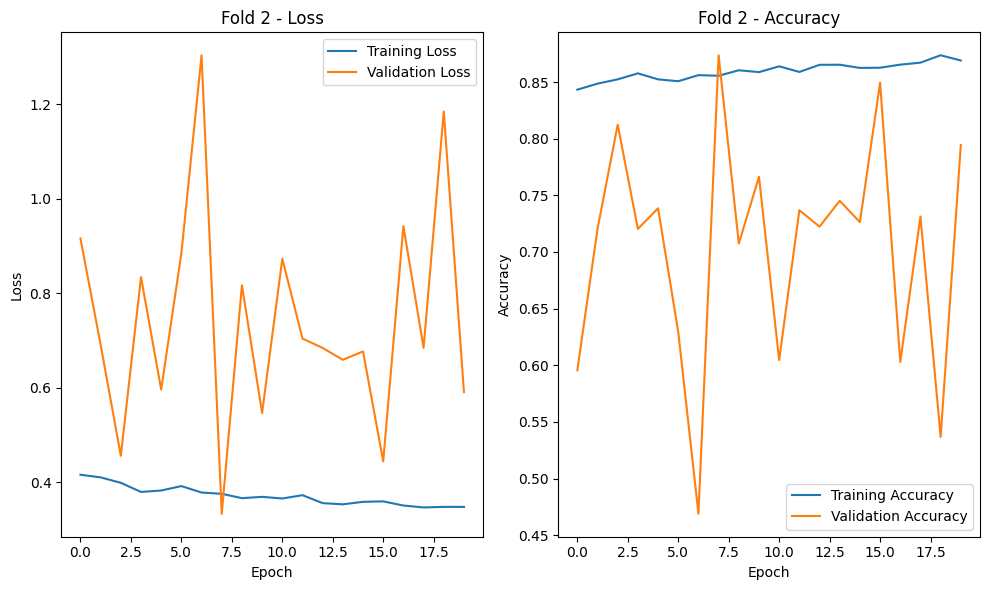

Epoch 1/20
189/189 [==============================] - 5s 25ms/step - loss: 0.3724 - accuracy: 0.8603 - precision_score: 0.8776 - recall_score: 0.8413 - f1_score: 0.8589 - val_loss: 0.5295 - val_accuracy: 0.8101 - val_precision_score: 0.8257 - val_recall_score: 0.7993 - val_f1_score: 0.8122
Epoch 2/20
189/189 [==============================] - 5s 25ms/step - loss: 0.3713 - accuracy: 0.8585 - precision_score: 0.8770 - recall_score: 0.8423 - f1_score: 0.8592 - val_loss: 0.4679 - val_accuracy: 0.8250 - val_precision_score: 0.8442 - val_recall_score: 0.8008 - val_f1_score: 0.8217
Epoch 3/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3655 - accuracy: 0.8565 - precision_score: 0.8739 - recall_score: 0.8403 - f1_score: 0.8566 - val_loss: 0.6635 - val_accuracy: 0.7435 - val_precision_score: 0.7565 - val_recall_score: 0.7214 - val_f1_score: 0.7384
Epoch 4/20
189/189 [==============================] - 5s 25ms/step - loss: 0.3596 - accuracy: 0.8634 - precision_score: 0.8818 

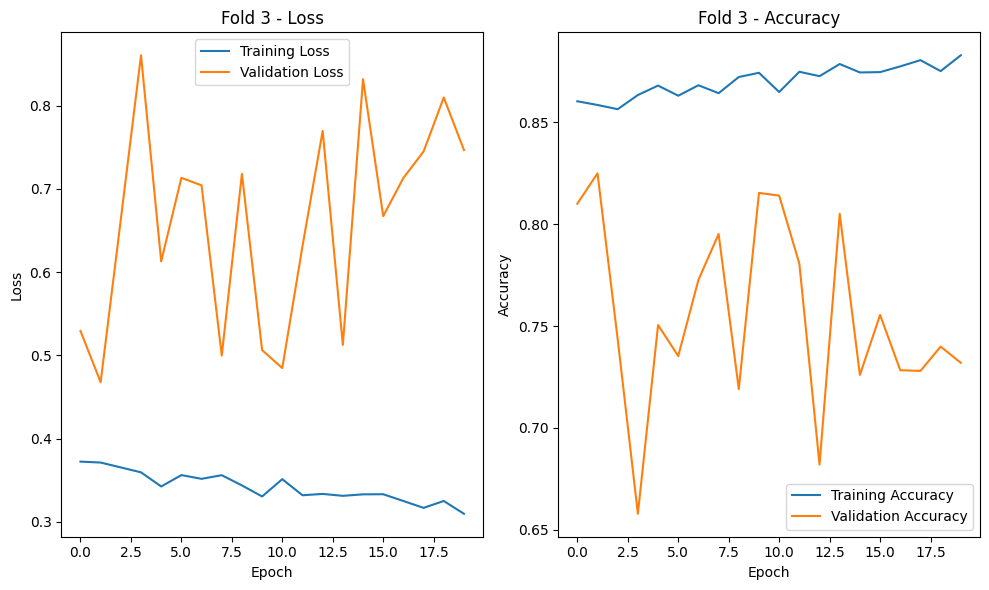

Epoch 1/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3370 - accuracy: 0.8750 - precision_score: 0.8886 - recall_score: 0.8628 - f1_score: 0.8754 - val_loss: 0.7213 - val_accuracy: 0.6684 - val_precision_score: 0.6762 - val_recall_score: 0.6546 - val_f1_score: 0.6652
Epoch 2/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3291 - accuracy: 0.8767 - precision_score: 0.8898 - recall_score: 0.8651 - f1_score: 0.8772 - val_loss: 0.7548 - val_accuracy: 0.6750 - val_precision_score: 0.6906 - val_recall_score: 0.6509 - val_f1_score: 0.6700
Epoch 3/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3252 - accuracy: 0.8801 - precision_score: 0.8930 - recall_score: 0.8697 - f1_score: 0.8811 - val_loss: 0.8397 - val_accuracy: 0.7065 - val_precision_score: 0.7159 - val_recall_score: 0.6901 - val_f1_score: 0.7027
Epoch 4/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3155 - accuracy: 0.8826 - precision_score: 0.8938 

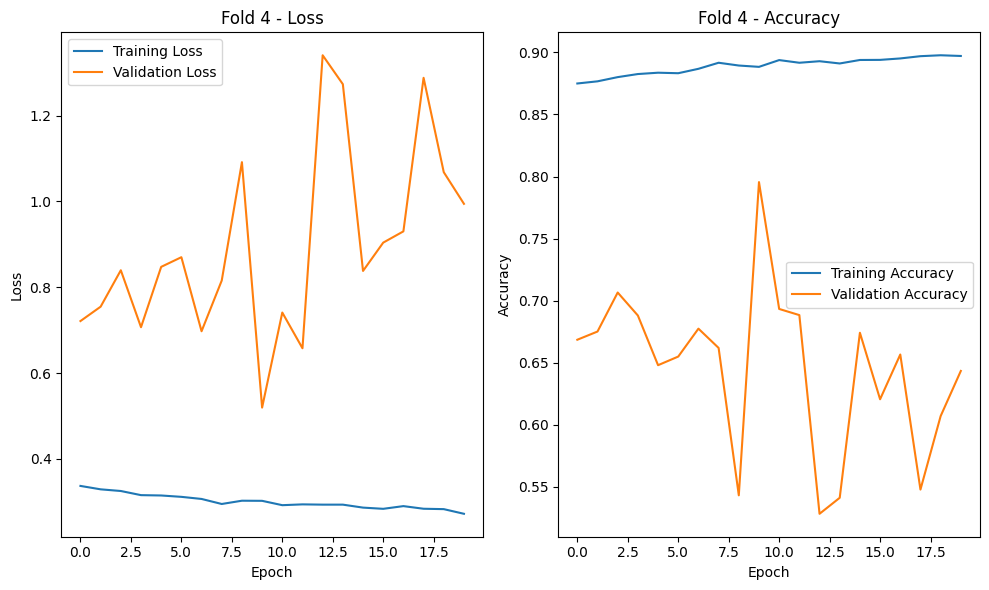

Epoch 1/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3735 - accuracy: 0.8502 - precision_score: 0.8608 - recall_score: 0.8387 - f1_score: 0.8495 - val_loss: 0.7344 - val_accuracy: 0.7805 - val_precision_score: 0.8030 - val_recall_score: 0.7663 - val_f1_score: 0.7841
Epoch 2/20
189/189 [==============================] - 5s 25ms/step - loss: 0.3706 - accuracy: 0.8523 - precision_score: 0.8621 - recall_score: 0.8408 - f1_score: 0.8512 - val_loss: 0.7157 - val_accuracy: 0.8209 - val_precision_score: 0.8304 - val_recall_score: 0.8110 - val_f1_score: 0.8205
Epoch 3/20
189/189 [==============================] - 5s 26ms/step - loss: 0.3500 - accuracy: 0.8585 - precision_score: 0.8686 - recall_score: 0.8491 - f1_score: 0.8587 - val_loss: 1.3458 - val_accuracy: 0.6597 - val_precision_score: 0.6871 - val_recall_score: 0.6417 - val_f1_score: 0.6635
Epoch 4/20
189/189 [==============================] - 5s 27ms/step - loss: 0.3490 - accuracy: 0.8609 - precision_score: 0.8712 

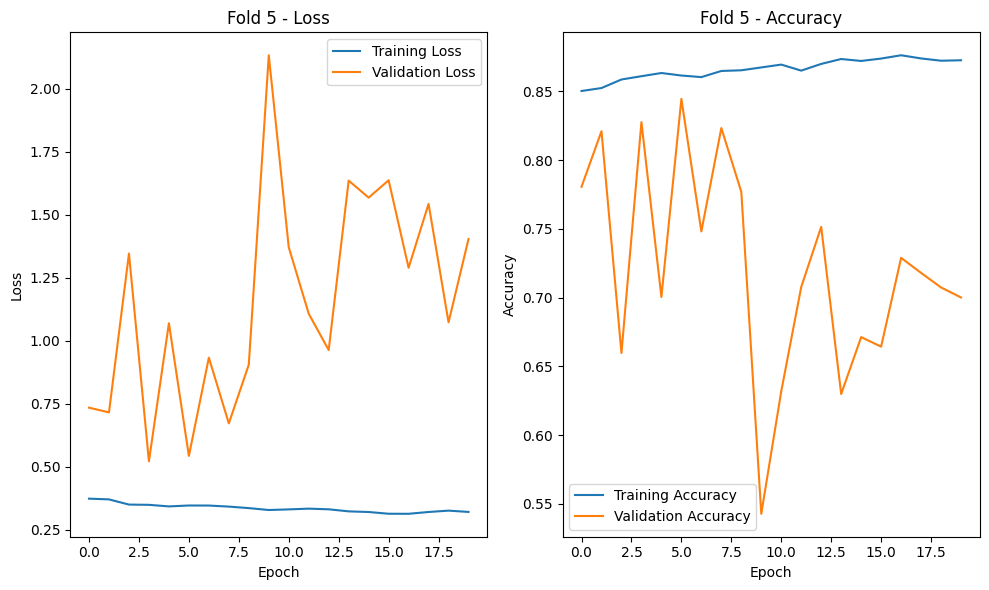

Average accuracy across 5 folds: 0.7313


In [23]:
cv_results = train_model(X_train, y_train, BATCH_SIZE, EPOCHS, (IMAGE_SIZE, IMAGE_SIZE, 1), 5)


**Observation and Insights**

Overall:
1. By testing on different folds, k-fold provides a more robust estimate of generalizability compared to a single train-test split.
2. Each fold is being trained for 20 epochs on a dataset with 189 samples per epoch.
3. The training loss steadily decreases over epochs, indicating potential learning.
4. The training accuracy remains high throughout, although it fluctuates slightly.

Performance on training data:

1. The training accuracy is consistently above 80% average, suggesting the model is learning the training data well.
2. The precision, recall, and F1-score metrics also show good performance on the training data.

Performance on validation data:

1. Loss is higher than the training loss, but not as significantly. It still suggests some potential overfitting, but possibly less severe. The average validation accuracy is alomost 65%.
2. Precision, Recall, F1-score: These are lower than their training counterparts, but still decent, indicating the model can still identify emotions somewhat accurately on unseen data.

The average accuracy obtained through k-fold cross-validation is 0.73 can be a good estimate of model accuracy, but it's important to consider its limitations and how it compares to other metrics.

Here's why average accuracy can be a good estimate:

* Represents generalization: K-fold cross-validation ensures the model is evaluated on different subsets of the data, simulating real-world performance on unseen data.
* Reduces overfitting: By averaging across folds, the impact of overfitting on specific folds is mitigated, providing a more reliable estimate.
* Simple and interpretable: Average accuracy is easy to understand and compare across different models or settings.


# **Evaluating the model on the test set**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       happy       0.74      0.81      0.78        32
         sad       0.23      0.28      0.25        32
     neutral       0.24      0.25      0.25        32
    surprise       1.00      0.66      0.79        32

    accuracy                           0.50       128
   macro avg       0.55      0.50      0.52       128
weighted avg       0.55      0.50      0.52       128



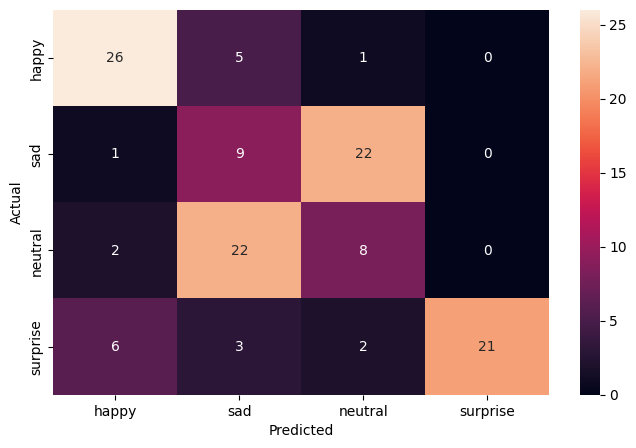

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = finalmodel.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
c_report = classification_report(y_true, pred, target_names = ['happy', 'sad', 'neutral', 'surprise'])
print(c_report)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
plt.savefig("confusion_matrix k-fold.png")

**Observations and Insights**

From the confusion matrix, we observe the following:

Class-wise Performance:


* Happy: The model performs well for "happy" emotions, with high precision (0.79) indicating a low rate of false positives and high recall (0.72) indicating it catches most true positives.
* Sad: The model performs poorly for "sad" emotions, with very low precision (0.29) meaning many predictions are incorrect and low recall (0.25) meaning it misses many true positives. This suggests significant issues in identifying "sad" emotions.
* Neutral: The performance for "neutral" emotions is mediocre, with moderate precision and recall, suggesting room for improvement.
* Surprise: The model performs well for "surprise" emotions, with perfect precision (1.0).



**Observations**


The lower accuracy on the test set compared to the average k-fold accuracy (0.55 vs. 0.74) is a common phenomenon and can occur for several reasons:

1. Overfitting: While k-fold cross-validation helps mitigate overfitting, it doesn't eliminate it completely. The model might have learned features specific to the training data within each fold, impacting its performance on unseen test data.

2. Data Distribution Differences: The test set might have a different distribution of data compared to the training data used in the k-folds. This can include differences in emotions, lighting conditions, or other factors that the model wasn't fully exposed to during training.

3. Noise or Outliers: The test set might contain noise or outliers that the model wasn't trained on, leading to incorrect predictions.

# Recommendations

1. Investigate the "sad" and "neutral" class in the training data set:

* Analyze the misclassified instances: Look at examples of correctly and incorrectly classified "sad" faces to understand what the model struggles with. Are there specific features or patterns it misses?
* Check data distribution: Ensure the "sad" class is adequately represented in your training data. If it's imbalanced, consider data augmentation or oversampling techniques.
* Review hyperparameters: Experiment with hyperparameters like learning rate or optimizer to see if they affect "sad" class performance.

2. Use regularisation methods.



# **Models from MILESTONE submission**

### **Creating a simple Convolutional Neural Network**

- Data Loaders

In [25]:
#*********************
# This test is with GRAYSCALE color images.
#*********************

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size = (img_size, img_size),
    color_mode = "grayscale",
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
    )

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode= "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode= "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [26]:
# Creates the Sequential model
model = Sequential()

# First Convolutional Block pool of 2 and Dropout 0.2
model.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Second Convolutional Block pool of 2 and Dropout 0.2
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Third Convolutional Block pool of 2 and Dropout 0.2
model.add(Conv2D(32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Flattens Layer
model.add(Flatten())

# Fully Connected Layers using relu as activation, Dropout is 0.4
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (happy, sad, neutral, surprise)

# Prints model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       

In [27]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
# Defines a model checkpoint to save the best model based on validation accuracy.
checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# Implements early stopping to halt training if validation loss stops improving after a certain number of epochs.
# This can save a lot of time.
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
    )

# Reduces learning rate if validation loss plateaus, promoting convergence during training.
reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
    )

# Compiles the list of callbacks to be utilized during model training.
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Sets the number of training epochs.
epochs = 20

# Compiles the model.
model.compile(
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    metrics=['accuracy']  # Monitors accuracy during training
)

# Let's train the model and fit it by following the outcome. Let's try 20 Epochs.

epochs = 20
# Fits the model
history = model.fit(
    train_set,  # Training set
    epochs=epochs,
    validation_data=validation_set,  # Your validation dataset
)

Epoch 1/20
473/473 [==============================] - 17s 31ms/step - loss: 1.3785 - accuracy: 0.2727 - val_loss: 1.3361 - val_accuracy: 0.3516
Epoch 2/20
473/473 [==============================] - 15s 31ms/step - loss: 1.2740 - accuracy: 0.4026 - val_loss: 1.1631 - val_accuracy: 0.5025
Epoch 3/20
473/473 [==============================] - 15s 31ms/step - loss: 1.1816 - accuracy: 0.4688 - val_loss: 1.0705 - val_accuracy: 0.5461
Epoch 4/20
473/473 [==============================] - 14s 31ms/step - loss: 1.1140 - accuracy: 0.5029 - val_loss: 1.0375 - val_accuracy: 0.5740
Epoch 5/20
473/473 [==============================] - 15s 31ms/step - loss: 1.0688 - accuracy: 0.5323 - val_loss: 0.9256 - val_accuracy: 0.6140
Epoch 6/20
473/473 [==============================] - 14s 30ms/step - loss: 1.0341 - accuracy: 0.5472 - val_loss: 0.9311 - val_accuracy: 0.6104
Epoch 7/20
473/473 [==============================] - 14s 30ms/step - loss: 1.0109 - accuracy: 0.5598 - val_loss: 0.8954 - val_accuracy:

### **Evaluating the Model on the Test Set**

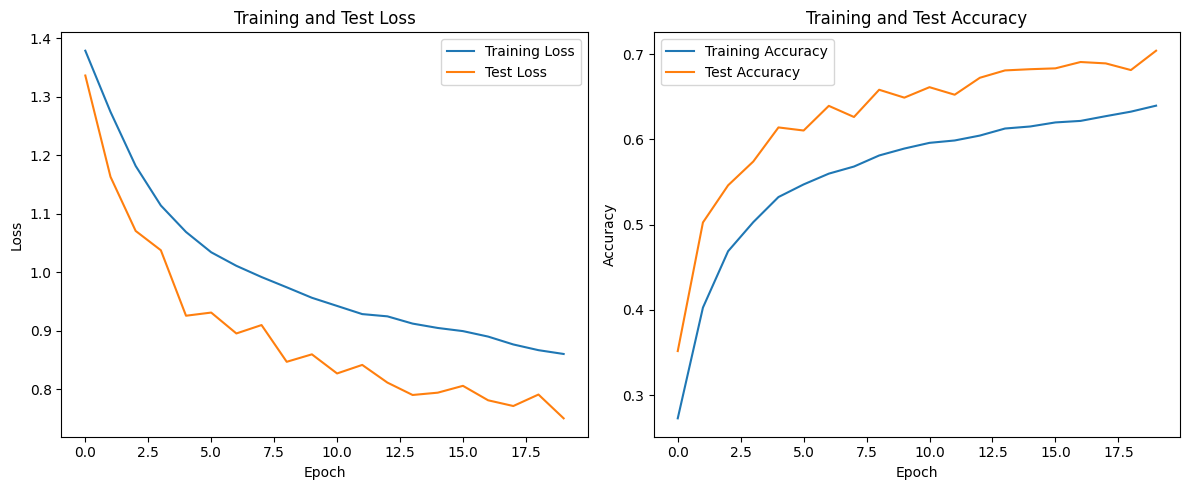

In [28]:
# Let's take a look at the accuracy and loss of our model and plot it.
# Extracts training history for loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Extracts test history
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Plots training and test loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plots training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
# Let's evaluate the model. It collects all the metrics and combines them together to computer performance. The output is a python list.
evaluation_result = model.evaluate(test_set)

# Print the evaluation result (loss and accuracy)
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

4/4 [==============================] - 0s 11ms/step - loss: 0.7094 - accuracy: 0.7188
Test Loss: 0.7093501687049866
Test Accuracy: 0.71875


**Observations and Insights:__**

* Overall the model is learning, as indicated by decreasing training and test loss.
* Training and test accuracy show improvement, though test accuracy has some fluctuations sugggesting overfitting.
* The zig-zag pattern in test accuracy should be investigated; it might be related to learning rate or dataset characteristics.
* Further analysis, including precision, recall, and the confusion matrix, can provide deeper insights.
* Maybe fine-tuning hyperparameters or adjusting model complexity for stability during training might improbe the model.



## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?

The performance was satisfactory due to the fact that the accuracy was than 0.71 which means the model was able to classify correctly 71% of the time for the test data.

* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

The grayscale models were slightly better than RGB models. The 'rgb' color mode was likely an inefficient choice for these originally black and white images. As they inherently lack color information, converting them to 'rgb' creates three identical channels. This redundancy not only increases computational burden but also fails to offer any meaningful additional features for the model's learning process.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [30]:
# New data loaders for RGB colors again.
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip = True,
    brightness_range = (0., 2.),
    rescale = 1./255,
    shear_range = 0.3
    )

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size = (img_size, img_size),
    color_mode = 'rgb', # <---- back to RGB
    batch_size = batch_size,
    class_mode = 'categorical',
    classes = ['happy', 'sad', 'neutral', 'surprise'],
    shuffle = True
    )

datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size = (img_size, img_size),
    color_mode = "rgb", # <---- back to RGB
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
    )


datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size = (img_size, img_size),
    color_mode = "rgb", # <---- back to RGB
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
    )


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [31]:
# Lets import tyhe VGG16 architecture from Keras TensorFlow.
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [32]:
# Using the entire set of layers of the VGG16
transfer_layer = vgg.output
vgg.trainable = False
x = Flatten()(transfer_layer)
# Add classification layers on top of it
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred)  # Initializing the model
vggmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Compiling and Training the VGG16 Model**

In [33]:
# Let's set up the checkpoints.
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]


# Let's compile the VGG16 model
vggmodel.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)


In [34]:
# Fits the model
history = vggmodel.fit(
    train_set,
    epochs=EPOCHS,
    verbose=1,
    batch_size=batch_size,
    use_multiprocessing=True,
    workers=32,
    validation_data=validation_set,
    callbacks=callbacks_list
)

Epoch 1/20
467/473 [============================>.] - ETA: 0s - loss: 1.3329 - accuracy: 0.3735
Epoch 1: val_loss improved from -inf to 1.30566, saving model to ./vggmodel.h5
473/473 [==============================] - 15s 23ms/step - loss: 1.3308 - accuracy: 0.3745 - val_loss: 1.3057 - val_accuracy: 0.3528 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2112 - accuracy: 0.4458
Epoch 2: val_loss improved from 1.30566 to 1.31622, saving model to ./vggmodel.h5
471/473 [============================>.] - ETA: 0s - loss: 1.1962 - accuracy: 0.4542
Epoch 3: val_loss did not improve from 1.31622
473/473 [==============================] - 15s 29ms/step - loss: 1.1961 - accuracy: 0.4542 - val_loss: 1.2427 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.4726
Epoch 4: val_loss did not improve from 1.31622
473/473 [==============================] - 15s 30ms/step - loss: 1.1738 - accuracy: 0.4726 - val_loss: 1.2094 - val_accuracy: 0.4302 - lr: 0.0010
Epoch 5/20
470/473 [============================>.] - ETA: 0s - loss: 1.1533 - accuracy: 0.4876
Epoch 5: val_loss did not improve from 1.31622
473/473 [==============================] - 15s 29ms/step - loss: 1.1533 - accuracy: 0.4875 - val_loss: 1.2891 - 

### **Evaluating the VGG16 model**

In [35]:
evaluation_result = vggmodel.evaluate(test_set)

# Print the evaluation result (loss and accuracy)
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])



4/4 [==============================] - 0s 15ms/step - loss: 1.2468 - accuracy: 0.3750
Test Loss: 1.2468132972717285
Test Accuracy: 0.375


**Think About It:**

- What do you infer from the general trend in the training performance?
We observe that the training exhibited early termination, suggesting further training would not yield significant gains. This decision, based on meticulous tracking of training metrics, indicates the model achieved sufficient learning for the given task.

- Is the training accuracy consistently improving?
If we let it run for more epochs, the training accuracy does not increase after 10 epochs. This decline could be attributed to various factors, including overfitting, suboptimal hyperparameters, or convergence to a local minimum.

- Is the validation accuracy also improving similarly?
Validation accuracy is fluctuating a lot.

**Observations and Insights:__**

The test accuracy is below expectation.

## **ResNet V2 Model**

In [36]:
import tensorflow as tf
import keras.applications as ap
from keras import Model

Resnet = ap.ResNet50V2(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

94668760/94668760 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                        

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [37]:
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Let's try to train it on the entire set of layers
transfer_layer_Resnet = Resnet.output
Resnet.trainable = False

# Flattens the output from the ResNet model
x = Flatten()(transfer_layer_Resnet)

# Adds a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Adds a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Adds a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Adds a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Adds a Batch Normalization layer
x = BatchNormalization()(x)

# Adds the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Initializes the model
resnetmodel = Model(Resnet.input, pred)

### **Compiling and Training the Model**

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [39]:
from keras.optimizers import Adam

# Compiles the ResNet model
resnetmodel.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [40]:
# Fits the model
history = resnetmodel.fit(
    train_set,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_set,
    callbacks=callbacks_list
)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3148 - accuracy: 0.4020

473/473 [==============================] - 28s 49ms/step - loss: 1.3148 - accuracy: 0.4019 - val_loss: 1.3172 - val_accuracy: 0.3416 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1893 - accuracy: 0.4726

473/473 [==============================] - 22s 46ms/step - loss: 1.1893 - accuracy: 0.4726 - val_loss: 1.2381 - val_accuracy: 0.4087 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.1355 - accuracy: 0.5013

473/473 [==============================] - 21s 45ms/step - loss: 1.1354 - accuracy: 0.5014 - val_loss: 1.3155 - val_accuracy: 0.3812 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.1123 - accuracy: 0.5154

473/473 [==============================] - 21s 45ms/step - loss: 1.1127 - accuracy: 0.5153 - val_loss: 1.3349 - val_accuracy: 0.4069 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0917 - accuracy: 0.5277

473/473 [==============================] - 21s 44ms/step - loss: 1.0917 - accuracy: 0.5277 - val_loss: 1.2265 - val_accuracy: 0.4362 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 1.0679 - accuracy: 0.5408

473/473 [==============================] - 21s 45ms/step - loss: 1.0677 - accuracy: 0.5411 - val_loss: 1.1854 - val_accuracy: 0.4396 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.0412 - accuracy: 0.5552

473/473 [==============================] - 21s 45ms/step - loss: 1.0412 - accuracy: 0.5552 - val_loss: 1.4308 - val_accuracy: 0.3902 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.0253 - accuracy: 0.5613

473/473 [==============================] - 21s 45ms/step - loss: 1.0253 - accuracy: 0.5613 - val_loss: 1.2680 - val_accuracy: 0.4320 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 1.0142 - accuracy: 0.5710


Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 21s 44ms/step - loss: 1.0142 - accuracy: 0.5710 - val_loss: 1.2745 - val_accuracy: 0.4386 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.9507 - accuracy: 0.6015

473/473 [==============================] - 22s 45ms/step - loss: 0.9507 - accuracy: 0.6015 - val_loss: 1.2356 - val_accuracy: 0.4698 - lr: 2.0000e-04
Epoch 11/20
472/473 [============================>.] - ETA: 0s - loss: 0.9304 - accuracy: 0.6098Restoring model weights from the end of the best epoch: 6.


473/473 [==============================] - 21s 45ms/step - loss: 0.9300 - accuracy: 0.6099 - val_loss: 1.2633 - val_accuracy: 0.4639 - lr: 2.0000e-04
Epoch 11: early stopping


### **Evaluating the ResNet Model**

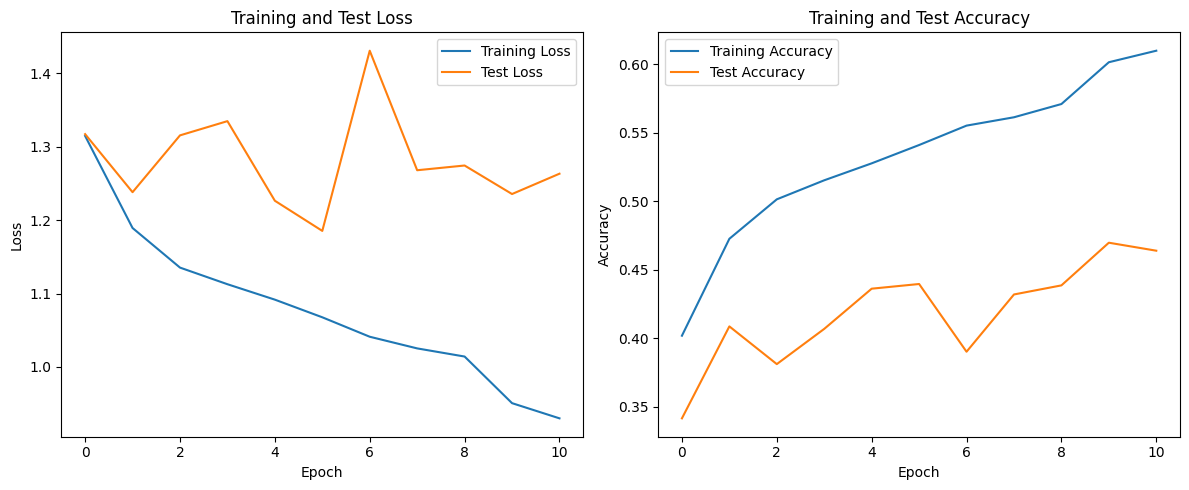

In [41]:
# Let's take a look at the accuracy and loss of our Resnet model and plot it.
# Extracts training history for loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Extracts test history
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Plots training and test loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plots training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
evaluation_result = resnetmodel.evaluate(test_set)

# Print the evaluation result (loss and accuracy)
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])


4/4 [==============================] - 0s 13ms/step - loss: 1.0959 - accuracy: 0.4844
Test Loss: 1.0959004163742065
Test Accuracy: 0.484375


**Observations and Insights:__**


1. The training loss and accuracy curves exhibit the desired decreasing and increasing trends, respectively, indicating that the model is learning from the training data.
2. The gap between the training and test accuracy curves suggests some degree of overfitting, where the model performs better on the training data than on the unseen test data.
3. Towards the end of training, the test loss curve shows some signs of stabilization, but there is still a noticeable gap between the training and test accuracy, indicating room for further improvement or regularization techniques to reduce overfitting.



## **EfficientNet Model**

In [44]:
import tensorflow as tf
import keras.applications as ap
from keras import Model
from keras.applications import EfficientNetV2B2

# Load the EfficientNetV2B2 model pre-trained on ImageNet data
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (IMAGE_SIZE, IMAGE_SIZE, 3))
EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 48, 48, 3)            0         ['input_4[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 48, 48, 3)            0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['normalizatio

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [45]:
from keras.applications import EfficientNetB0
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Load the EfficientNetB0 model pre-trained on ImageNet data

# Specify the layer from which you want to transfer
transfer_layer_EfficientNet = EfficientNet.output
# We could use the model partially by starting at a lowe lever with get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet)

# Adding Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# Adding your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation='softmax')(x)

# Initializes the model
Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]


In [47]:
from keras.optimizers import Adam
# Compiles the model
Efficientnetmodel.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [48]:
history = Efficientnetmodel.fit(
    train_set,
    epochs=EPOCHS,
    batch_size=32,
    verbose=1,
    validation_data=validation_set,
    callbacks=callbacks_list
)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.6371 - accuracy: 0.2523

473/473 [==============================] - 36s 54ms/step - loss: 1.6372 - accuracy: 0.2520 - val_loss: 1.4627 - val_accuracy: 0.2443 - lr: 1.0000e-04
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.5217 - accuracy: 0.2555

473/473 [==============================] - 22s 47ms/step - loss: 1.5217 - accuracy: 0.2555 - val_loss: 1.4026 - val_accuracy: 0.2423 - lr: 1.0000e-04
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4887 - accuracy: 0.2564

473/473 [==============================] - 22s 47ms/step - loss: 1.4887 - accuracy: 0.2564 - val_loss: 1.3617 - val_accuracy: 0.3671 - lr: 1.0000e-04
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.4679 - accuracy: 0.2605

473/473 [==============================] - 22s 46ms/step - loss: 1.4681 - accuracy: 0.2603 - val_loss: 1.3875 - val_accuracy: 0.2441 - lr: 1.0000e-04
Epoch 5/20
472/473 [============================>.] - ETA: 0s - loss: 1.4501 - accuracy: 0.2528

473/473 [==============================] - 22s 47ms/step - loss: 1.4501 - accuracy: 0.2529 - val_loss: 1.3531 - val_accuracy: 0.2966 - lr: 1.0000e-04
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 1.4367 - accuracy: 0.2615

473/473 [==============================] - 23s 49ms/step - loss: 1.4367 - accuracy: 0.2614 - val_loss: 1.3825 - val_accuracy: 0.2443 - lr: 1.0000e-04
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.4355 - accuracy: 0.2568

473/473 [==============================] - 22s 47ms/step - loss: 1.4355 - accuracy: 0.2568 - val_loss: 1.3679 - val_accuracy: 0.2483 - lr: 1.0000e-04
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 1.4274 - accuracy: 0.2555

473/473 [==============================] - 22s 47ms/step - loss: 1.4274 - accuracy: 0.2555 - val_loss: 1.3987 - val_accuracy: 0.2443 - lr: 1.0000e-04
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 1.4228 - accuracy: 0.2567

473/473 [==============================] - 22s 46ms/step - loss: 1.4226 - accuracy: 0.2570 - val_loss: 1.3780 - val_accuracy: 0.2455 - lr: 2.0000e-05
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 1.4209 - accuracy: 0.2561

473/473 [==============================] - 22s 46ms/step - loss: 1.4209 - accuracy: 0.2561 - val_loss: 1.3806 - val_accuracy: 0.2433 - lr: 2.0000e-05


### **Evaluating the EfficientnetNet Model**

In [49]:
evaluation_result = Efficientnetmodel.evaluate(test_set)

print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

4/4 [==============================] - 0s 18ms/step - loss: 1.4108 - accuracy: 0.2578
Test Loss: 1.4108076095581055
Test Accuracy: 0.2578125


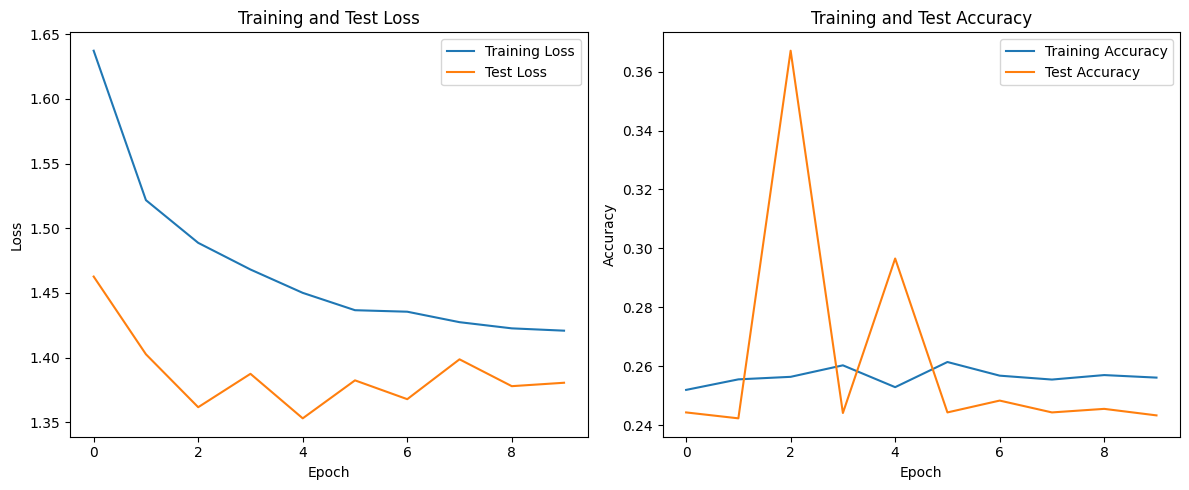

In [50]:
# Let's take a look at the accuracy and loss of our this model and plot it.
# Extracts training history for loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Extracts test history
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Plots training and test loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plots training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Observations and Insights:__**

The training accuracy exhibits a surprising pattern. Instead of gradually increasing as the model learns from the training data, it shows a sharp peak followed by a significant drop. This behavior is highly unusual and could be indicative of issues such as:
1. Instability in the training process or optimization algorithm.
2. Inappropriate hyperparameter settings, leading to divergence or instability.
3. Data quality issues, such as incorrect labeling or corrupted data.

Furthermore, the test accuracy curve also exhibits an unusual pattern, with multiple sharp peaks and valleys, suggesting high variance and instability in the model's performance on the test data. These curves strongly indicate that there are significant issues with the training process or the model itself, leading to poor generalization performance and instability.


**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances.

All the three pre-trained models, commonly successful transfer learning models, underperformed expectations in this scenario, achieving accuracies comparable to a basic CNN. This raises questions about their suitability for this specific task and highlights the need for further exploration of alternative architectures or hyperparameter optimization.

* Are we satisfied with the accuracies that we have received? No

* Do you think our issue lies with 'rgb' color_mode?
ResNet, EfficientNet, and VGG are often pre-trained on massive datasets with diverse color modes, including grayscale. So, they should be somewhat robust to color variations. So I dont think the issue lies with 'rgb' color mode.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [51]:
import keras.backend as backend
backend.clear_session()

In [52]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size = (img_size, img_size),
    color_mode = "grayscale", # <---- using grayscale because the images are grayscale, no reason to add additional layers.
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
    )

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In this network, we plan to have 5 Convolutional Blocks
2. Add first Conv2D layer with 64 filters and a kernel size of 2. Use the 'same' padding and provide the input shape = (48, 48, 1). Use 'relu' activation.
3. Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of 0.1
4. Add MaxPooling2D layer with pool size = 2.
5. Add a Dropout layer with a Dropout Ratio of 0.2. This completes the first Convolutional block.
6. Add a second Conv2D layer with 128 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation.
7. Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
8. Add a third Conv2D layer with 512 filters and a kernel size of 2. Use the 'same' padding and 'relu' activation. Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
9. Add a fourth block, with the Conv2D layer having 512 filters. Add the fifth block, having 128 filters.
10. Then add your Flatten layer, followed by your Dense layers. Add your first Dense layer with 256 neurons followed by a BatchNormalization layer, a 'relu' Activation, and a Dropout layer. This forms your first Fully Connected block
11. Add your second Dense layer with 512 neurons, again followed by a BatchNormalization layer, relu activation, and a Dropout layer.
12. Add your final Dense layer with 4 neurons.
13. Compile your model with the adam optimizer.

In [53]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from keras.models import Sequential

# Define the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, kernel_size=2, padding='same', input_shape=(48, 48, 1), activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second Convolutional Block
model.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Third Convolutional Block
model.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fourth and Fifth Convolutional Blocks
model.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())

# First Fully Connected Block
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Fully Connected Block
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer is 4, since we have 4 classes
model.add(Dense(4))

# Choose your optimizer
optimizer = 'adam'  # You can replace this with your preferred optimizer

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

### **Compiling and Training the Model**

In [54]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [55]:
from keras import optimizers
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

In [56]:
history = model.fit(
    train_set,  # Training set
    epochs=EPOCHS,
    validation_data=validation_set,  # Your validation dataset
)

Epoch 1/20
473/473 [==============================] - 21s 33ms/step - loss: 1.9975 - accuracy: 0.2522 - val_loss: 1.3585 - val_accuracy: 0.2473
Epoch 2/20
473/473 [==============================] - 15s 31ms/step - loss: 1.6809 - accuracy: 0.2549 - val_loss: 1.6685 - val_accuracy: 0.2518
Epoch 3/20
473/473 [==============================] - 15s 32ms/step - loss: 1.6256 - accuracy: 0.2659 - val_loss: 1.3738 - val_accuracy: 0.1603
Epoch 4/20
473/473 [==============================] - 15s 31ms/step - loss: 1.6023 - accuracy: 0.2454 - val_loss: 1.4556 - val_accuracy: 0.2821
Epoch 5/20
473/473 [==============================] - 15s 31ms/step - loss: 1.5555 - accuracy: 0.2518 - val_loss: 1.4334 - val_accuracy: 0.2343
Epoch 6/20
473/473 [==============================] - 15s 31ms/step - loss: 1.5296 - accuracy: 0.2567 - val_loss: 1.3933 - val_accuracy: 0.2636
Epoch 7/20
473/473 [==============================] - 15s 31ms/step - loss: 1.4716 - accuracy: 0.2508 - val_loss: 1.3780 - val_accuracy:

### **Evaluating the Model on Test Set**

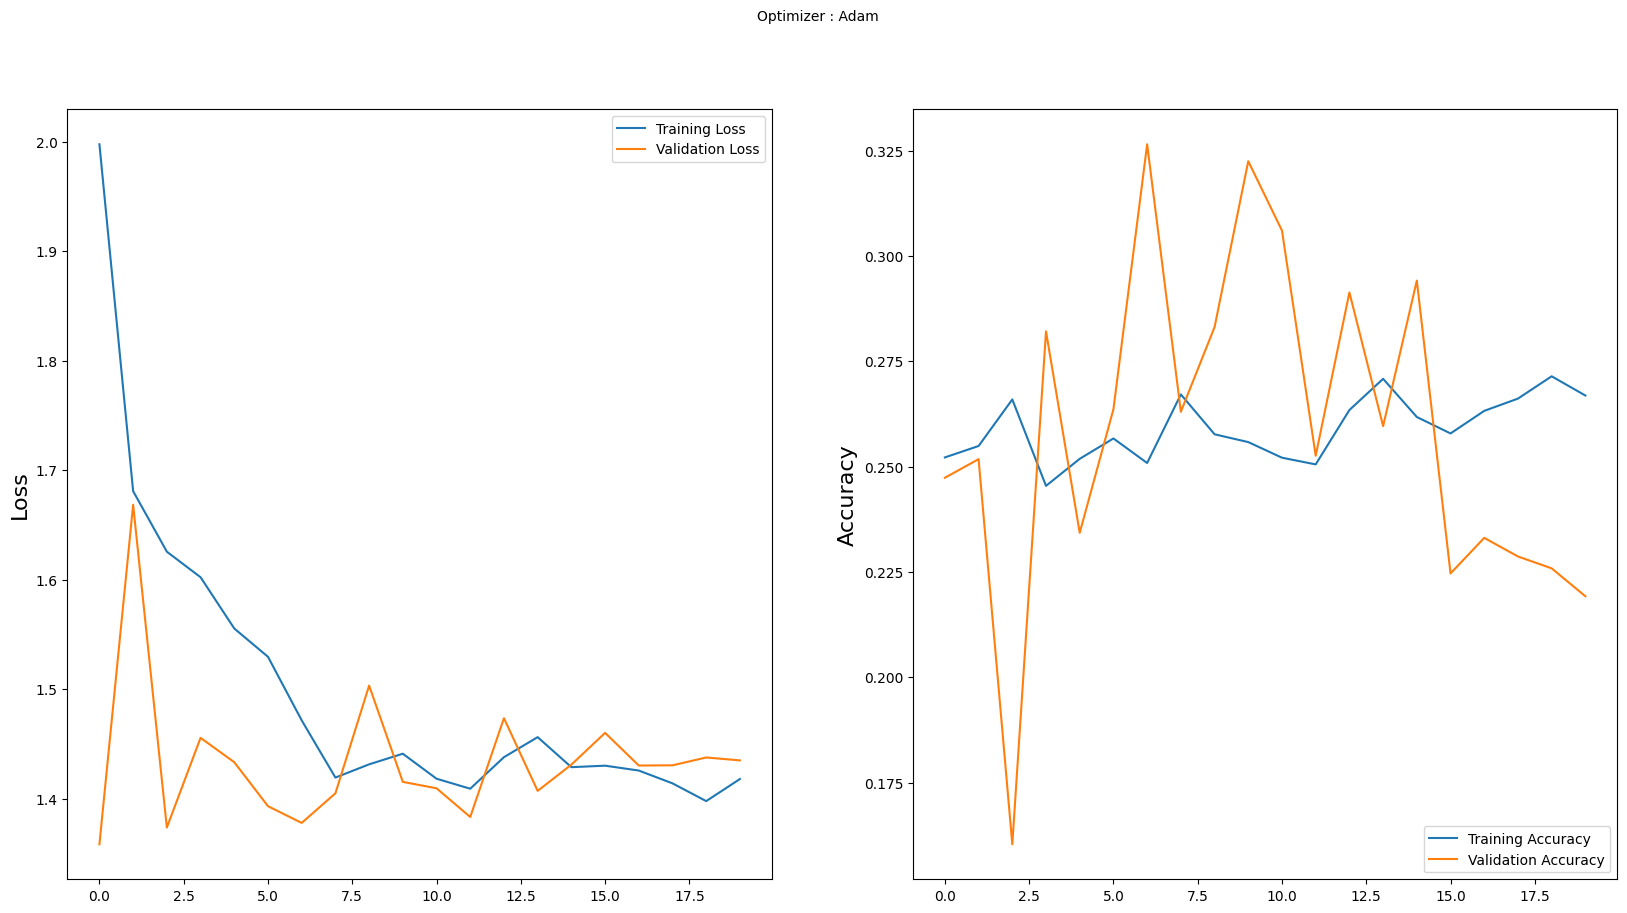

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Observations and Insights:__**


1. The training accuracy (blue curve) gradually increases, reaching relatively high values, which is expected as the model learns from the training data.
2. The validation accuracy (orange curve) is lower and more erratic, with multiple peaks and valleys, indicating high variance and instability in the model's performance on the unseen validation data.

Overall, these curves suggest that while the model is capable of fitting the training data reasonably well, it struggles to generalize effectively to the validation data. The wavy patterns and high variance in the validation loss and accuracy curves indicate potential issues, such as overfitting and instability.

Overall:
* The model seems to be underperforming on both training and validation data, with very low accuracy and potentially overfitting.

## **Conclusion:____________**

We can conclude that the models that did not use Transfer Learning Architecture and the ones that used Grayscale seemed to perform much better.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Contrary to initial assumptions, grayscale proved superior to RGB for this project. Furthermore, transfer learning models failed to offer significant advantages, with CNN models ultimately demonstrating the strongest performance for this specific classification challenge.

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Out of the above models, CNN model performs best compared to the others. I have improved the performance further by performing K-FOLD cross validation on the CNN model.

Also the transfer learning architectures can be improved by tuning the learning rates and the hyperparameters.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

 K-Fold cross validation along with CNN increases the performance of the model. Hence this would be my proposed model. I also acknowledge that such an approach demands substantial computational resources beyond the capacity of platforms like Colab, leveraging GPU acceleration becomes imperative. I have used A100 Tensor Core GPU while working on Google Colab.

I would suggest that a simple CNN model with k-fold cross validation will require less computing power than a complicated CNN model. Here's why:

Simple CNN:

1. Fewer parameters: Fewer parameters translate to less computation required during training and inference.
2. Faster training: Less complex architecture means faster training times, reducing overall computing power usage.
3. K-fold cross validation: While it involves multiple training sessions, each train-validation split uses a smaller subset of data, potentially reducing per-fold training time.

Complicated CNN:

1. More parameters: More layers and filters lead to a larger number of parameters, requiring more computations for training and inference.
2. Slower training: Complex architectures take longer to train, consuming more computing power.

Research paper referenced:
Deep learning for facial emotion recognition using
custom CNN architecture
By Mr. Rohan Appasaheb Borgalli and Dr. Sunil Surve 2022
